<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

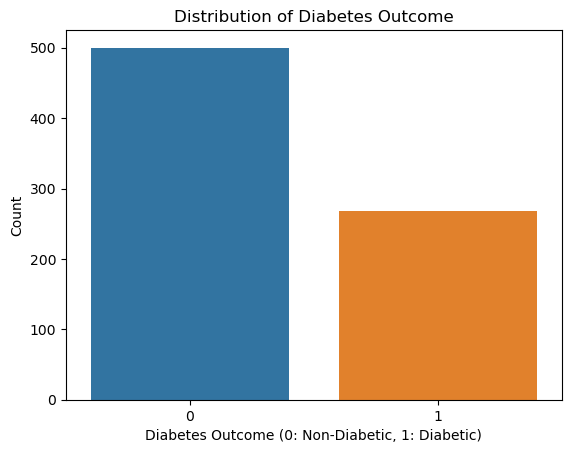

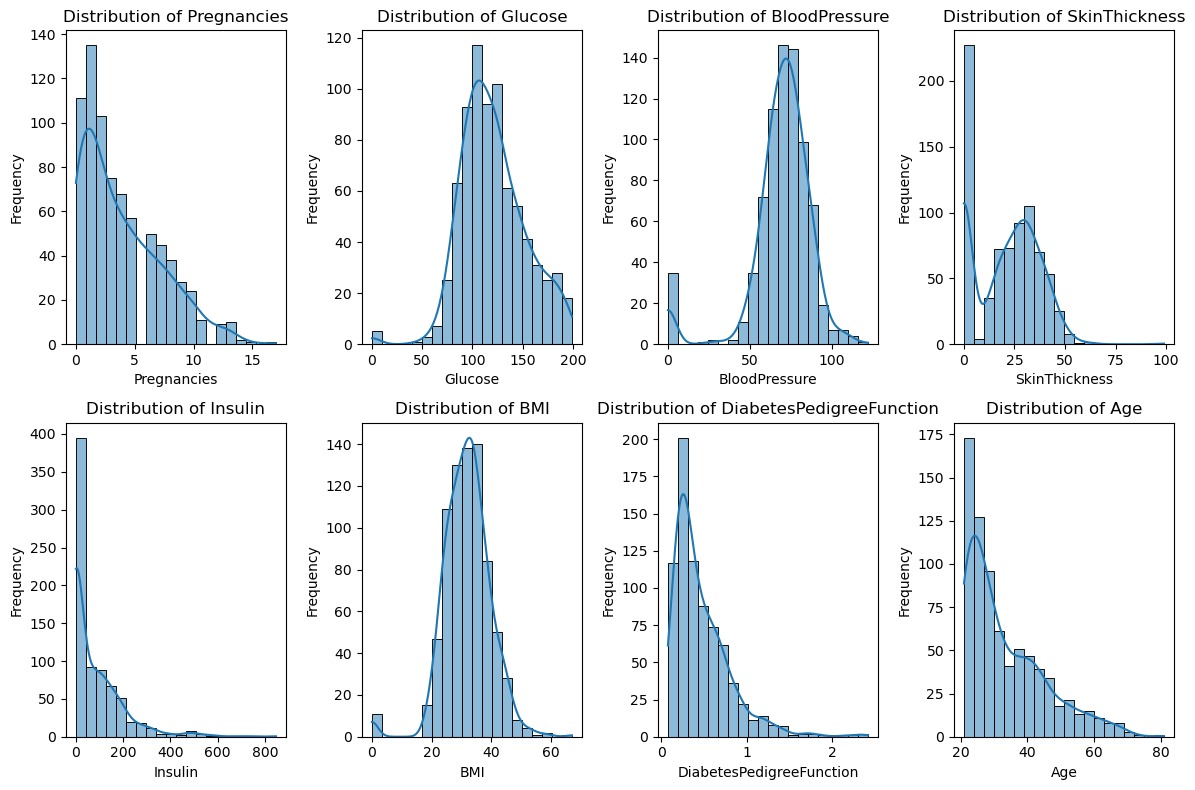

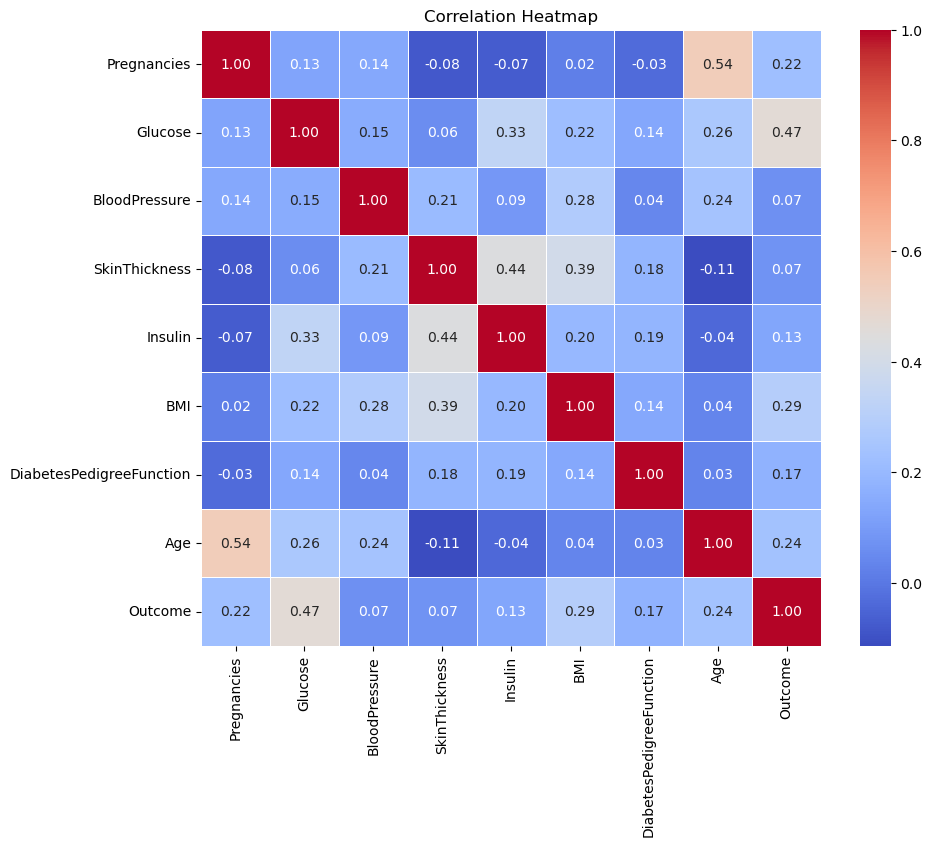

In [6]:
# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
# understand the distribution and relationships between the variables.


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Summary statistics of the numeric variables
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the outcome variable (diabetes)
sns.countplot(x="Outcome", data=data)
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0: Non-Diabetic, 1: Diabetic)")
plt.ylabel("Count")
plt.show()

# Visualize the distribution of numeric variables
numeric_vars = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_vars, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Visualize the correlation between variables
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


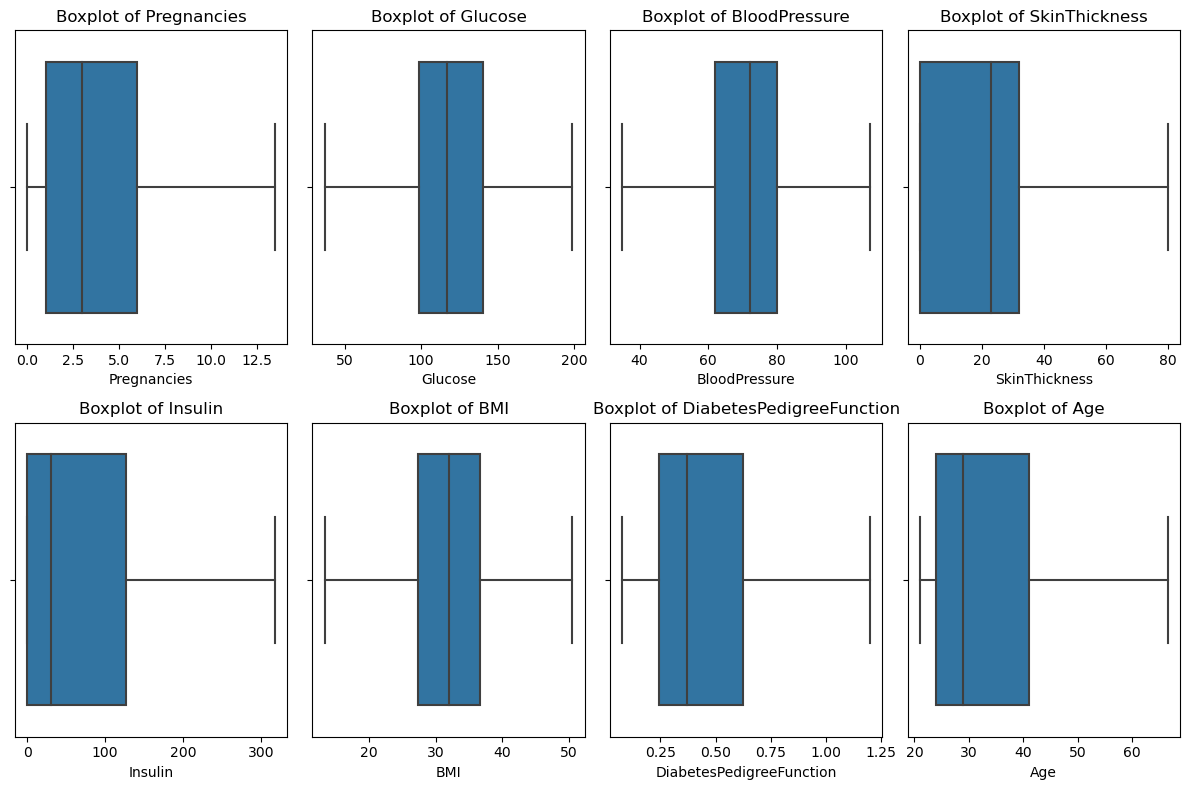

In [2]:
# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
# variables into dummy variables if necessary.


# Check for and handle outliers using IQR method
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Handle outliers for numeric variables
numeric_vars = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

for var in numeric_vars:
    handle_outliers(data, var)

# Verify that outliers have been handled
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [3]:
# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.



from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_seed = 42

# Define the features (X) and the target variable (y)
X = data.drop("Outcome", axis=1)  # Features
y = data["Outcome"]  # Target variable

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [4]:
# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
# cross-validation to optimize the hyperparameters and avoid overfitting.


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the DecisionTreeClassifier
# You can specify hyperparameters like max_depth, min_samples_split, etc.
# For simplicity, we'll leave them at their default values.
clf = DecisionTreeClassifier(random_state=random_seed)

# Perform cross-validation to optimize hyperparameters
# Here, we'll use cross_val_score to evaluate the model's performance using 5-fold cross-validation
# You can adjust the number of folds and other scoring metrics as needed.
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()

# Train the model on the entire training set
clf.fit(X_train, y_train)

# Evaluate the model's performance on the test set
test_accuracy = clf.score(X_test, y_test)

# Print the results
print("Mean Cross-Validation Accuracy:", mean_cv_score)
print("Test Set Accuracy:", test_accuracy)


Mean Cross-Validation Accuracy: 0.6986938557910168
Test Set Accuracy: 0.7337662337662337


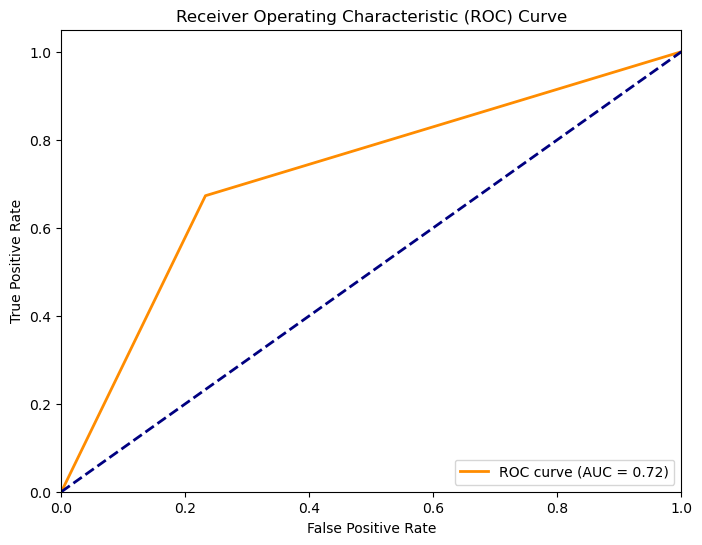

Accuracy: 0.7337662337662337
Precision: 0.6166666666666667
Recall: 0.6727272727272727
F1 Score: 0.6434782608695652

Confusion Matrix:
[[76 23]
 [18 37]]


In [5]:
# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
# precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of being in class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)


In [ ]:
Validating a decision tree model involves assessing its performance on new or unseen data and testing its robustness to changes in the dataset or the environment. Sensitivity analysis and scenario testing can help explore uncertainty and risks associated with the model. Here's how you can perform these validation steps:

1. **Cross-Validation**:
   - One of the initial steps in model validation is using cross-validation during the model training phase. This helps estimate the model's generalization performance and ensures that it's not overfitting the training data.

2. **Test Set Evaluation**:
   - As you've already done, evaluate the decision tree model on a dedicated test set that the model hasn't seen during training. This provides a realistic assessment of its performance on new data.

3. **Sensitivity Analysis**:
   - Conduct sensitivity analysis to assess how changes in specific input features impact model predictions. This can help identify which variables have the most significant influence on the model's decisions.
   - Vary the values of key features while keeping others constant and observe how predictions change. For example, test how variations in glucose levels affect diabetes predictions.

4. **Scenario Testing**:
   - Test the model's robustness to different scenarios or situations that it may encounter in the real world.
   - Create scenarios where certain variables might deviate from their typical values or where data quality is compromised.
   - For example, simulate scenarios where glucose measurements are noisy or incomplete and evaluate how the model performs in such situations.

5. **Data Drift and Concept Drift**:
   - Monitor data drift and concept drift over time if the model is deployed in a dynamic environment.
   - Data drift occurs when the distribution of incoming data changes over time, which can impact model performance. Continuously monitor and retrain the model to adapt to these changes.
   - Concept drift refers to changes in the underlying relationships between variables and the target variable. If the relationships evolve, re-evaluate the model's performance and consider updating it.

6. **Robustness Testing**:
   - Test the model's robustness to outliers, missing values, or unexpected input patterns.
   - Introduce noise or outliers into the input data to see how the model handles unexpected data points.

7. **A/B Testing**:
   - If applicable, consider conducting A/B testing in a controlled environment to assess the model's performance in a real-world setting. Compare the model's predictions with actual outcomes in real-time.

8. **Feedback Loop**:
   - Implement a feedback loop where the model's predictions and outcomes are continuously monitored.
   - If discrepancies or issues arise, use this feedback to refine the model, update its training data, or retrain it as needed.

9. **Documentation**:
   - Document the results of sensitivity analysis, scenario testing, and any observed model behavior in different situations. This documentation is essential for model governance and risk management.

By systematically applying these validation techniques and continually monitoring the model's performance in real-world scenarios, you can gain confidence in its reliability and identify potential areas of improvement or risk mitigation.